In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import os
from IPython.display import display, HTML
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

In [37]:
# Define constants
SUPPORTER = 0
UNDECIDED = 1
OPPOSITION = 2

# Professional color scheme
SUPPORTER_COLOR = '#FB9F89'  # Coral
UNDECIDED_COLOR = '#201E1F'  # Black
OPPOSITION_COLOR = '#50B2C0'  # Blue
COLOR_PALETTE = [SUPPORTER_COLOR, UNDECIDED_COLOR, OPPOSITION_COLOR]

# Load experiment results
def load_experiment_results(filepath):
    """Load experiment results from a pickle file."""
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
    return data

# Path to the experiment results
results_path = "../results/grassroots_vs_establishment/grassroots_vs_establishment_20250411_161204_n_nodes_1000_shock_duration_20_total_steps_150.pkl"

# Load the results
experiment_data = load_experiment_results(results_path)

# Extract configuration and results
config = experiment_data['config']
results = experiment_data['results']

# Display configuration
print("Experiment Configuration:")
for key, value in config.items():
    print(f"  {key}: {value}")


# Basic information about the results
network_types = list(results.keys())
strategies = list(results[network_types[0]].keys())

print("\nNetwork types:", network_types)
print("Strategies:", strategies)

Experiment Configuration:
  n_nodes: 1000
  shock_duration: 20
  total_steps: 150
  num_trials: 5
  lambda_s: 0.12
  lambda_o: 0.12

Network types: ['scale-free', 'small-world', 'random']
Strategies: ['No shock', 'Establishment (High-degree targets)', 'Grassroots (Random targets)']


/var/folders/qq/vh114g916ydccg5ydgm445n40000gn/T/ipykernel_91348/3621270946.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([strategy_labels.get(s, s) for s in strategies])
/var/folders/qq/vh114g916ydccg5ydgm445n40000gn/T/ipykernel_91348/3621270946.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([strategy_labels.get(s, s) for s in strategies])
/var/folders/qq/vh114g916ydccg5ydgm445n40000gn/T/ipykernel_91348/3621270946.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([strategy_labels.get(s, s) for s in strategies])


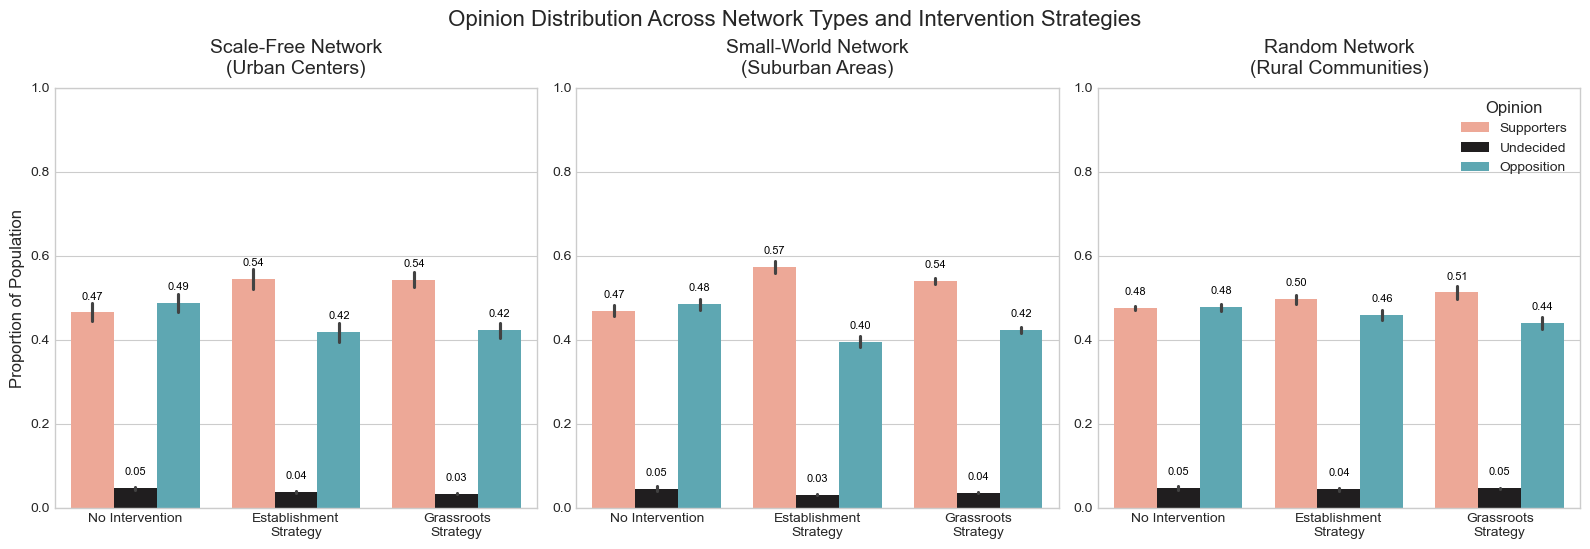

In [38]:
# Create figure for barplots of final opinion distributions
fig1, axes = plt.subplots(1, len(network_types), figsize=(16, 6))

for i, network_type in enumerate(network_types):
    ax = axes[i]
    
    # Data for plotting
    data = {
        'Strategy': [],
        'Opinion': [],
        'Proportion': []
    }
    
    for strategy in strategies:
        for opinion, idx in [('Supporters', SUPPORTER), ('Undecided', UNDECIDED), ('Opposition', OPPOSITION)]:
            # Use correct keys for each opinion
            opinion_key = 'supporter_final' if opinion == 'Supporters' else ('undecided_final' if opinion == 'Undecided' else 'opposition_final')
            values = results[network_type][strategy][opinion_key]
            
            # Add to data for seaborn plotting
            data['Strategy'].extend([strategy] * len(values))
            data['Opinion'].extend([opinion] * len(values))
            data['Proportion'].extend(values)

    sns.barplot(x='Strategy', y='Proportion', hue='Opinion', 
               data=data, ax=ax, 
               palette=COLOR_PALETTE, 
               errorbar='se')
    
    network_type_titles = {
        'scale-free': 'Scale-Free Network\n(Urban Centers)',
        'small-world': 'Small-World Network\n(Suburban Areas)',
        'random': 'Random Network\n(Rural Communities)'
    }
    
    ax.set_title(network_type_titles.get(network_type, network_type.title()), fontsize=14, pad=10)
    ax.set_ylim(0, 1)
    ax.set_xlabel('')
    
    if i == 0:
        ax.set_ylabel('Proportion of Population', fontsize=12)
    else:
        ax.set_ylabel('')
    
    if i == len(network_types) - 1:
        ax.legend(title="Opinion", title_fontsize=12, fontsize=10)
    else:
        ax.legend([], [], frameon=False)
    
    # Enhanced x-axis labels
    strategy_labels = {
        'No shock': 'No Intervention',
        'Establishment (High-degree targets)': 'Establishment\nStrategy',
        'Grassroots (Random targets)': 'Grassroots\nStrategy'
    }
    ax.set_xticklabels([strategy_labels.get(s, s) for s in strategies])
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')
    
    # Add data value labels on the bars
    for p in ax.patches:
        # format with 2 decimal places
        value_str = f'{p.get_height():.2f}'

        if value_str != '0.00':
            ax.annotate(value_str, 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=8, color='black', 
                    xytext=(0, 8), textcoords='offset points')

# Overall title
plt.suptitle('Opinion Distribution Across Network Types and Intervention Strategies', 
            y=0.98, fontsize=16)

plt.tight_layout()
fig1.subplots_adjust(top=0.85, bottom=0.15)
plt.show()

/var/folders/qq/vh114g916ydccg5ydgm445n40000gn/T/ipykernel_91348/1458427130.py:75: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  shock_span = ax.axvspan(shock_start, shock_end, alpha=0.15, color='gray', edgecolor='none')
/var/folders/qq/vh114g916ydccg5ydgm445n40000gn/T/ipykernel_91348/1458427130.py:111: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axins.axvspan(shock_start, shock_end, alpha=0.15, color='gray', edgecolor='none')


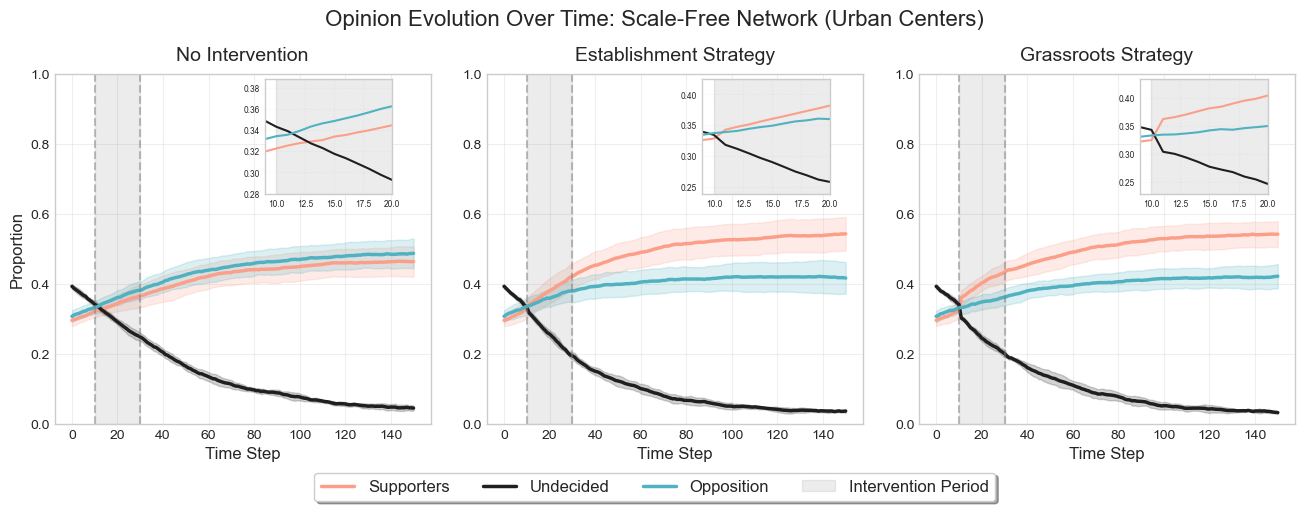

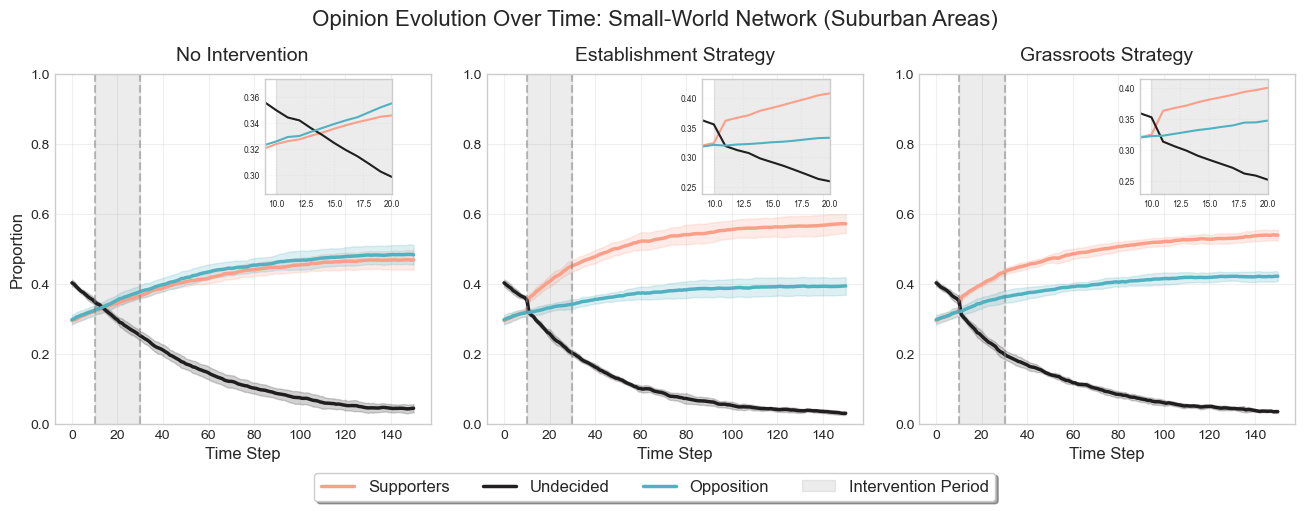

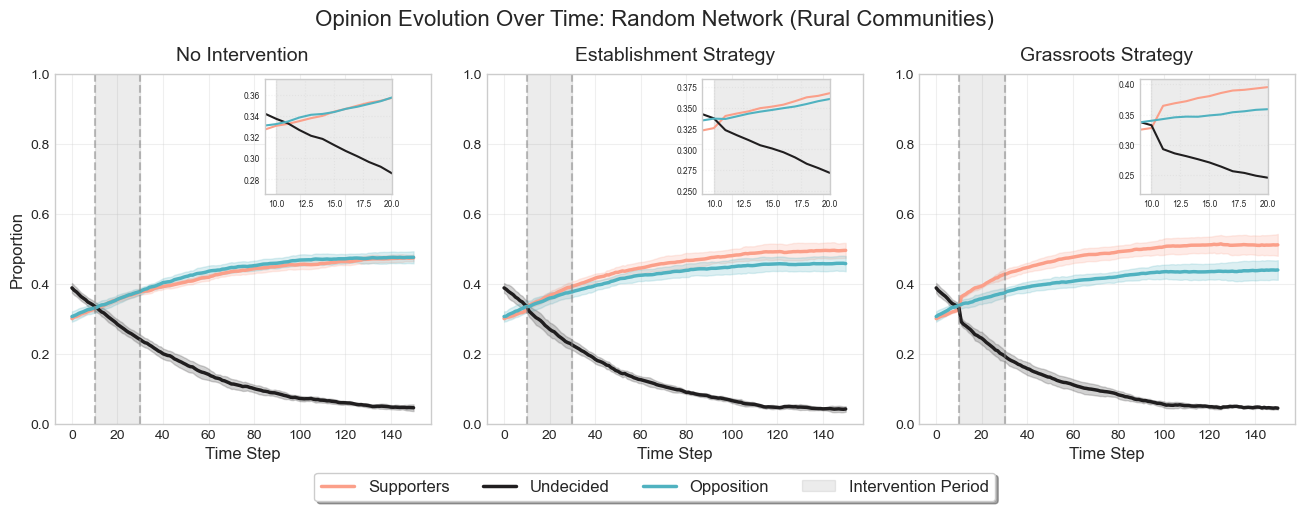

In [73]:
# Create three separate figures, one for each network type
network_type_titles = {
    'scale-free': 'Scale-Free Network (Urban Centers)',
    'small-world': 'Small-World Network (Suburban Areas)',
    'random': 'Random Network (Rural Communities)'
}

strategy_labels = {
    'No shock': 'No Intervention',
    'Establishment (High-degree targets)': 'Establishment Strategy',
    'Grassroots (Random targets)': 'Grassroots Strategy'
}

# Add shock period indicator
shock_start = 10
shock_end = 10 + 20  # shock_duration
# Zoom range for insets
zoom_start = 9
zoom_end = 20    # Show up to 30 (includes intervention period and immediate aftermath)

for i, network_type in enumerate(network_types):
    # Create a new figure for each network type
    fig, axes = plt.subplots(1, len(strategies), figsize=(16, 5))
    
    for j, strategy in enumerate(strategies):
        ax = axes[j]
        
        if 'all_histories' in results[network_type][strategy] and len(results[network_type][strategy]['all_histories']) > 0:
            # Get all histories for this network type and strategy
            all_histories = results[network_type][strategy]['all_histories']
            
            # Calculate mean and std for each time step
            num_steps = len(all_histories[0])
            supporters_data = np.zeros((len(all_histories), num_steps))
            undecided_data = np.zeros_like(supporters_data)
            opposition_data = np.zeros_like(supporters_data)
            
            # Collect data from all trials
            for k, hist in enumerate(all_histories):
                if len(hist) == num_steps:  # Ensure same length
                    supporters_data[k] = [h[SUPPORTER] for h in hist]
                    undecided_data[k] = [h[UNDECIDED] for h in hist]
                    opposition_data[k] = [h[OPPOSITION] for h in hist]
            
            # Calculate means and standard deviations
            supporters_mean = np.mean(supporters_data, axis=0)
            supporters_std = np.std(supporters_data, axis=0)
            undecided_mean = np.mean(undecided_data, axis=0)
            undecided_std = np.std(undecided_data, axis=0)
            opposition_mean = np.mean(opposition_data, axis=0)
            opposition_std = np.std(opposition_data, axis=0)
            
            steps = range(num_steps)
            
            # Plot means
            line_s = ax.plot(steps, supporters_mean, '-', color=SUPPORTER_COLOR, linewidth=2.5, label='Supporters')
            line_u = ax.plot(steps, undecided_mean, '-', color=UNDECIDED_COLOR, linewidth=2.5, label='Undecided')
            line_o = ax.plot(steps, opposition_mean, '-', color=OPPOSITION_COLOR, linewidth=2.5, label='Opposition')
            
            # Add real confidence intervals
            ax.fill_between(steps, 
                           supporters_mean - supporters_std, 
                           supporters_mean + supporters_std, 
                           color=SUPPORTER_COLOR, alpha=0.2)
            ax.fill_between(steps, 
                           undecided_mean - undecided_std, 
                           undecided_mean + undecided_std, 
                           color=UNDECIDED_COLOR, alpha=0.2)
            ax.fill_between(steps, 
                           opposition_mean - opposition_std, 
                           opposition_mean + opposition_std, 
                           color=OPPOSITION_COLOR, alpha=0.2)
            
            # Highlight the shock period with better styling
            shock_span = ax.axvspan(shock_start, shock_end, alpha=0.15, color='gray', edgecolor='none')
            
            # Add subtle vertical lines at intervention boundaries
            ax.axvline(x=shock_start, color='gray', linestyle='--', alpha=0.5)
            ax.axvline(x=shock_end, color='gray', linestyle='--', alpha=0.5)
            
            # Create inset plot using fig.add_axes
            # Get position of each subplot
            bbox = ax.get_position()
            
            # CUSTOMIZE INSET POSITION FOR EACH NETWORK TYPE
            inset_width = bbox.width * 0.35
            inset_height = bbox.height * 0.3
            inset_x = bbox.x0 + (bbox.width * 0.75) - (inset_width * 0.5)
            
            # Different y-position for each network type
            if network_type == 'scale-free':
                inset_y = bbox.y0 + bbox.height * 0.65  
            elif network_type == 'small-world':
                inset_y = bbox.y0 + bbox.height * 0.65  
            else:  # random
                inset_y = bbox.y0 + bbox.height * 0.65 
            
            # Create inset axes
            axins = fig.add_axes([inset_x, inset_y, inset_width, inset_height])
            
            # Filter data for the zoom period
            mask = (np.array(steps) >= zoom_start) & (np.array(steps) <= zoom_end)
            zoom_steps = np.array(steps)[mask]
            
            # Plot on inset with thinner lines
            axins.plot(zoom_steps, supporters_mean[mask], '-', color=SUPPORTER_COLOR, linewidth=1.5)
            axins.plot(zoom_steps, undecided_mean[mask], '-', color=UNDECIDED_COLOR, linewidth=1.5)
            axins.plot(zoom_steps, opposition_mean[mask], '-', color=OPPOSITION_COLOR, linewidth=1.5)
            
            # Highlight intervention period in inset too
            axins.axvspan(shock_start, shock_end, alpha=0.15, color='gray', edgecolor='none')
            
            # Set x-limits for inset
            axins.set_xlim(zoom_start, zoom_end)
            
            # Set y-limits for inset - make them adaptive to the data in this window
            min_val = min(np.min(supporters_mean[mask] - supporters_std[mask]),
                         np.min(undecided_mean[mask] - undecided_std[mask]),
                         np.min(opposition_mean[mask] - opposition_std[mask]))
            max_val = max(np.max(supporters_mean[mask] + supporters_std[mask]),
                         np.max(undecided_mean[mask] + undecided_std[mask]),
                         np.max(opposition_mean[mask] + opposition_std[mask]))
            
            # Add 5% padding and ensure bounds are valid
            padding = (max_val - min_val) * 0.05
            min_val = max(0, min_val - padding)
            max_val = min(1, max_val + padding)
            axins.set_ylim(min_val, max_val)
            
            # Simplify inset style
            # axins.set_title("Intervention Period", fontsize=8)
            axins.tick_params(labelsize=6)
            axins.grid(True, alpha=0.2, linestyle=':')
            
            # Main plot styling
            ax.set_ylim(0, 1)
            ax.grid(True, alpha=0.3)
            
            # Add title for each subplot
            ax.set_title(strategy_labels.get(strategy, strategy), fontsize=14, pad=10)
            
            # Add y-label only for first subplot
            if j == 0:
                ax.set_ylabel('Proportion', fontsize=12)
            
            # Add x-label for all subplots
            ax.set_xlabel('Time Step', fontsize=12)
            
            # Enhance tick labels
            ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Create a single legend for each figure
    handles = [
        plt.Line2D([0], [0], color=SUPPORTER_COLOR, linewidth=2.5, label='Supporters'),
        plt.Line2D([0], [0], color=UNDECIDED_COLOR, linewidth=2.5, label='Undecided'),
        plt.Line2D([0], [0], color=OPPOSITION_COLOR, linewidth=2.5, label='Opposition'),
        plt.Rectangle((0, 0), 1, 1, color='gray', alpha=0.15, label='Intervention Period')
    ]
    
    # Add the legend at the bottom
    fig.legend(handles=handles, fontsize=12, loc='lower center', ncol=4, 
              bbox_to_anchor=(0.5, -0.02), frameon=True, fancybox=True, shadow=True)
    
    # Add title for each figure
    plt.suptitle(f'Opinion Evolution Over Time: {network_type_titles[network_type]}',
                y=0.98, fontsize=16)
    
    # Adjust layout
    fig.subplots_adjust(top=0.85, bottom=0.15, wspace=0.15)
    
    # Show each figure
    plt.show()

,Network Type,Strategy,Baseline,Final Proportion,Gain
0,scale-free,Establishment (High-degree targets),0.4652,0.5442,0.0790
1,scale-free,Grassroots (Random targets),0.4652,0.5432,0.0780
2,small-world,Establishment (High-degree targets),0.4696,0.5730,0.1034
3,small-world,Grassroots (Random targets),0.4696,0.5404,0.0708
4,random,Establishment (High-degree targets),0.4754,0.4970,0.0216
5,random,Grassroots (Random targets),0.4754,0.5128,0.0374


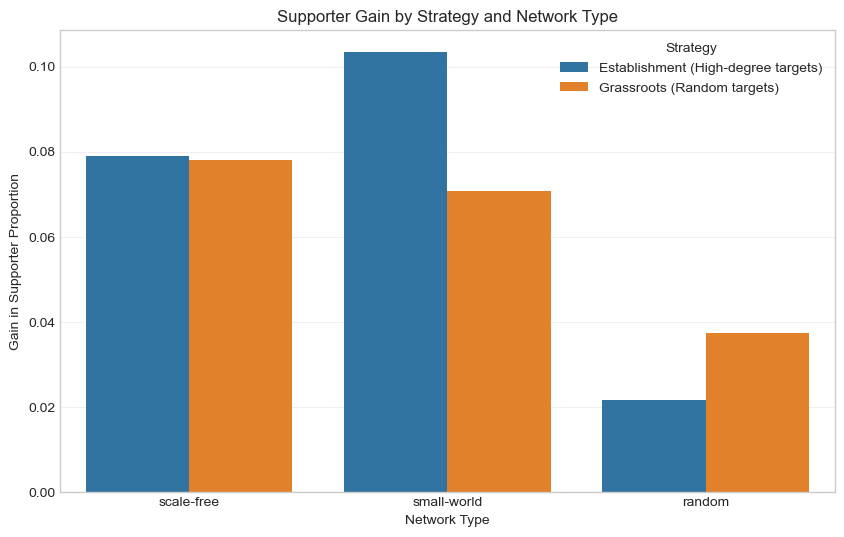

In [74]:
# Calculate the gain in supporters for each strategy compared to no shock
gains_data = []

for network_type in network_types:
    baseline = np.mean(results[network_type]['No shock']['supporter_final'])
    
    for strategy in [s for s in strategies if s != 'No shock']:
        strategy_mean = np.mean(results[network_type][strategy]['supporter_final'])
        gain = strategy_mean - baseline
        
        gains_data.append({
            'Network Type': network_type,
            'Strategy': strategy,
            'Baseline': baseline,
            'Final Proportion': strategy_mean,
            'Gain': gain
        })

gains_df = pd.DataFrame(gains_data)
display(gains_df)

# Plot the gains
plt.figure(figsize=(10, 6))
sns.barplot(x='Network Type', y='Gain', hue='Strategy', data=gains_df)
plt.title('Supporter Gain by Strategy and Network Type')
plt.ylabel('Gain in Supporter Proportion')
plt.grid(axis='y', alpha=0.3)
plt.show()

,Network Type,Establishment Gain,Grassroots Gain,Effectiveness Ratio (G/E)
0,scale-free,0.0790,0.0780,0.987342
1,small-world,0.1034,0.0708,0.684720
2,random,0.0216,0.0374,1.731481


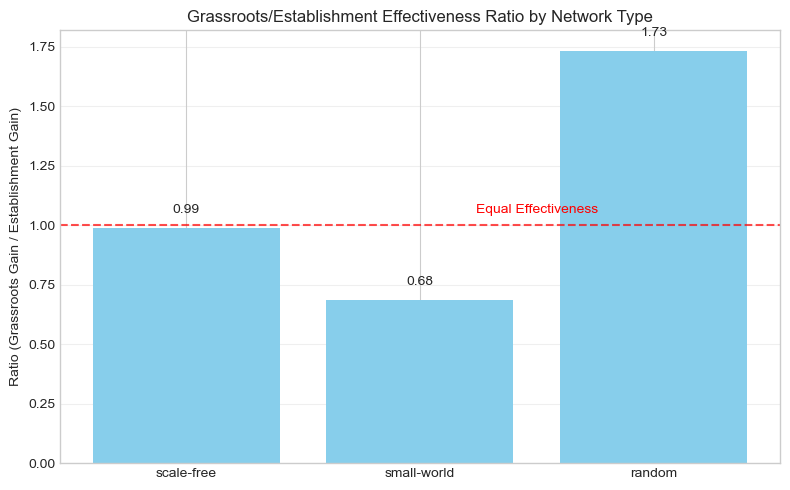

In [76]:
# Calculate the ratio of effectiveness: Grassroots / Establishment
effectiveness_ratio = []

for network_type in network_types:
    baseline = np.mean(results[network_type]['No shock']['supporter_final'])
    
    establishment_gain = np.mean(results[network_type]['Establishment (High-degree targets)']['supporter_final']) - baseline
    grassroots_gain = np.mean(results[network_type]['Grassroots (Random targets)']['supporter_final']) - baseline
    
    ratio = grassroots_gain / establishment_gain if establishment_gain != 0 else np.nan
    
    effectiveness_ratio.append({
        'Network Type': network_type,
        'Establishment Gain': establishment_gain,
        'Grassroots Gain': grassroots_gain,
        'Effectiveness Ratio (G/E)': ratio
    })

ratio_df = pd.DataFrame(effectiveness_ratio)
display(ratio_df)

# Plot the ratio
plt.figure(figsize=(8, 5))
bars = plt.bar(ratio_df['Network Type'], ratio_df['Effectiveness Ratio (G/E)'], color='skyblue')
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7)
plt.title('Grassroots/Establishment Effectiveness Ratio by Network Type')
plt.ylabel('Ratio (Grassroots Gain / Establishment Gain)')
plt.text(1.5, 1.05, 'Equal Effectiveness', color='red', ha='center')

# Add ratio values on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{ratio_df["Effectiveness Ratio (G/E)"].iloc[i]:.2f}', 
             ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()